In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt 
import numpy as np

def load_images(dir):
    images = []
    for filename in os.listdir(dir):
        img = Image.open(dir + "/" + filename)#.load()
        images.append(img)
        print(filename)

    return images

In [2]:
images = load_images("images")
#images[0].show()

blue_car.webp
blue_mug_close.jpeg
cat1.jpg
cat2.webp
red_mug_holding.webp
red_mug_top.jpg
retriever1.webp
retriever2.jpg
red_mug.jpg


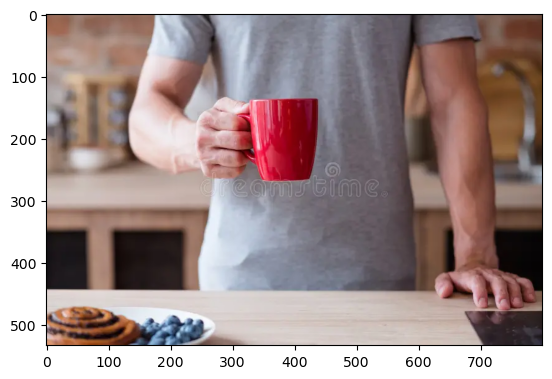

In [3]:
plt.imshow(images[4])

In [4]:
from dreamsim import dreamsim

/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model, preprocess = dreamsim(pretrained=True, device="cpu")


Using cached ./models


Using cache found in ./models/facebookresearch_dino_main
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


tensor([0.5887])


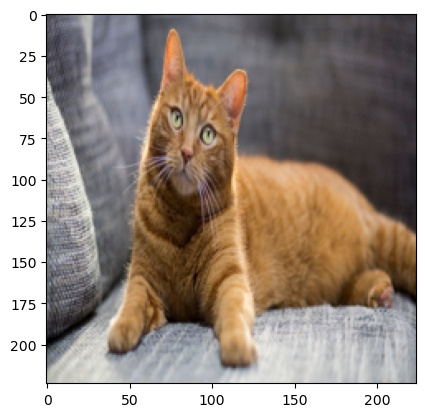

In [6]:
img1 = preprocess(images[2])
img2 = preprocess(images[7])
img1.shape
plt.imshow( np.transpose(img1.squeeze(0), axes=[1, 2, 0]) )
#plt.imshow( np.transpose(img2.squeeze(0), axes=[1, 2, 0]) )

distance = model(img1, img2)
print(distance)

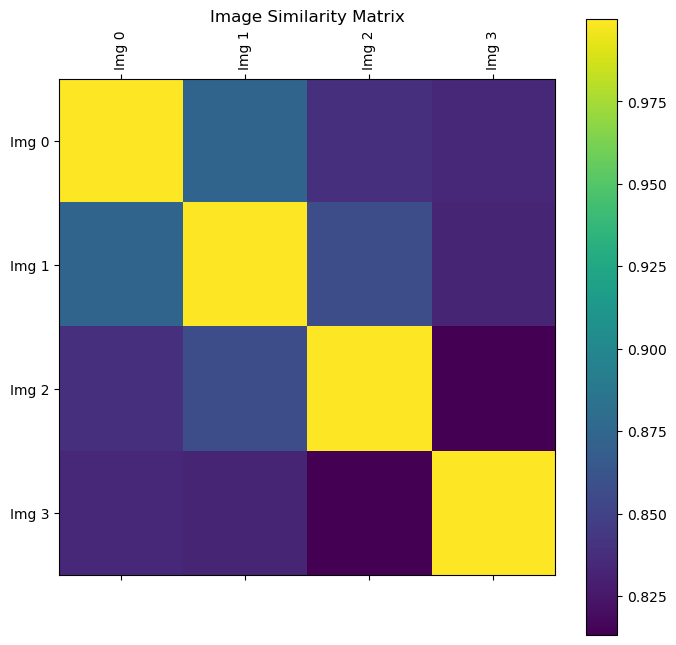

In [10]:
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def load_images(image_paths, size=(224, 224)):
    """
    Load and resize images, return as flattened arrays.
    """
    images = []
    for path in image_paths:
        img = Image.open(path).convert('RGB').resize(size)
        img_array = np.array(img).astype(np.float32).flatten()
        images.append(img_array)
    return np.stack(images)

def compute_similarity_matrix(image_vectors):
    """
    Compute cosine similarity between all pairs.
    """
    return cosine_similarity(image_vectors)

def plot_similarity_matrix(sim_matrix, image_paths):
    """
    Plot similarity matrix with image thumbnails as row/col labels.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(sim_matrix, cmap='viridis')
    fig.colorbar(cax)

    # Optionally show filenames as labels
    ax.set_xticks(np.arange(len(image_paths)))
    ax.set_yticks(np.arange(len(image_paths)))
    ax.set_xticklabels([f'Img {i}' for i in range(len(image_paths))], rotation=90)
    ax.set_yticklabels([f'Img {i}' for i in range(len(image_paths))])

    plt.title("Image Similarity Matrix")
    plt.show()

if __name__ == "__main__":
    # Example usage
    image_paths = [
        'images/cat1.jpg',
        'images/cat2.webp',
        'images/retriever1.webp',
        'images/red_mug.jpg'
    ]

    image_vectors = load_images(image_paths)
    sim_matrix = compute_similarity_matrix(image_vectors)
    plot_similarity_matrix(sim_matrix, image_paths)


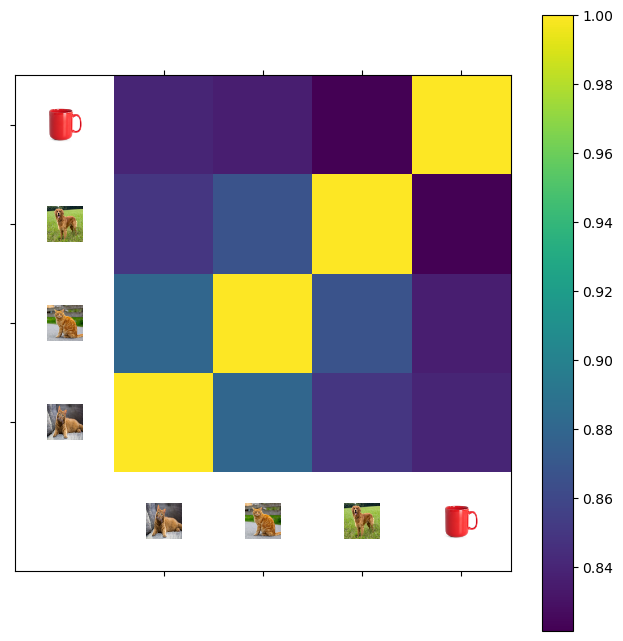

In [25]:
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def load_images(image_paths, size=(64, 64)):
    """
    Load and resize images, return as flattened arrays + thumbnails.
    """
    image_vectors = []
    thumbnails = []
    for path in image_paths:
        img = Image.open(path).convert('RGB').resize(size)
        img_array = np.array(img).astype(np.float32).flatten()
        image_vectors.append(img_array)
        thumbnails.append(img)
    return np.stack(image_vectors), thumbnails

def compute_similarity_matrix(image_vectors):
    return cosine_similarity(image_vectors)

def plot_similarity_matrix_with_images(sim_matrix, thumbnails):
    n = sim_matrix.shape[0]
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(sim_matrix, cmap='viridis')

    fig.colorbar(cax)

    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))

    # Remove default labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    HORIZONTAL_OFFSET = 1.0   # push down
    VERTICAL_OFFSET = -1.0     # push left

    # Expand the axes so images aren’t clipped
    ax.set_xlim(VERTICAL_OFFSET - 0.5, n - 0.5)
    #ax.set_ylim(HORIZONTAL_OFFSET - 0.5, n - 0.5)
    
    HORIZONTAL_OFFSET = -1.0  # above first row

    # Extend Y-axis upward
    ax.set_ylim(HORIZONTAL_OFFSET - 0.5, n - 0.5)

    # Add horizontal images above first row
    for i, thumbnail in enumerate(thumbnails):
        imagebox = OffsetImage(thumbnail, zoom=0.4)
        ab = AnnotationBbox(imagebox, (i, HORIZONTAL_OFFSET), frameon=False, xycoords='data')
        ax.add_artist(ab)

    # Vertical: push left
    for i, thumbnail in enumerate(thumbnails):
        imagebox = OffsetImage(thumbnail, zoom=0.4)
        ab = AnnotationBbox(imagebox, (VERTICAL_OFFSET, i), frameon=False, xycoords='data')
        ax.add_artist(ab)


if __name__ == "__main__":
    #image_paths = [
        #'image1.jpg',
        #'image2.jpg',
        #'image3.jpg',
        #'image4.jpg'
    #]
    image_paths = [
        'images/cat1.jpg',
        'images/cat2.webp',
        'images/retriever1.webp',
        'images/red_mug.jpg'
    ]

    image_vectors, thumbnails = load_images(image_paths)
    sim_matrix = compute_similarity_matrix(image_vectors)
    plot_similarity_matrix_with_images(sim_matrix, thumbnails)


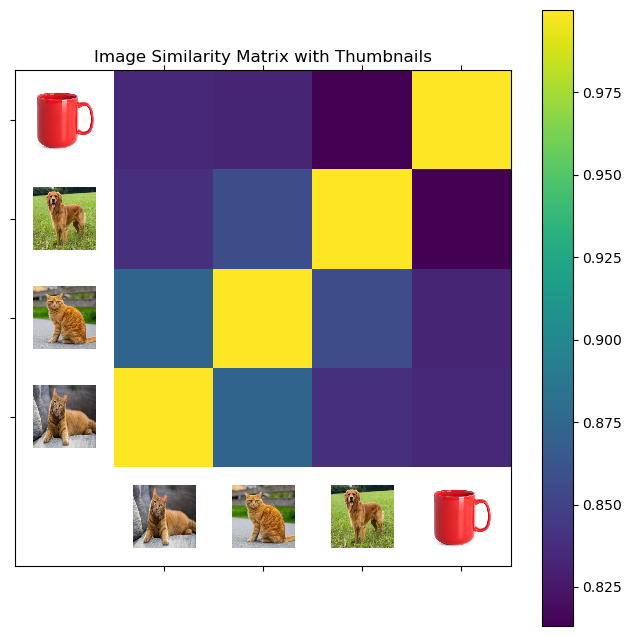

In [30]:
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def load_images(image_paths, size=(224, 224)):
    """
    Load and resize images, return as flattened arrays + thumbnails.
    """
    image_vectors = []
    thumbnails = []
    for path in image_paths:
        img = Image.open(path).convert('RGB').resize(size)
        img_array = np.array(img).astype(np.float32).flatten()
        image_vectors.append(img_array)
        thumbnails.append(img)
    return np.stack(image_vectors), thumbnails

def compute_similarity_matrix(image_vectors):
    return cosine_similarity(image_vectors)

def plot_similarity_matrix_with_thumbnails(sim_matrix, thumbnails):
    n = sim_matrix.shape[0]

    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(sim_matrix, cmap='viridis')
    fig.colorbar(cax)

    # Remove default tick labels
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # ✅ Offsets
    HORIZONTAL_OFFSET = -1.0   # ABOVE first row (row 0)
    VERTICAL_OFFSET = -1.0     # LEFT of first column (col 0)

    # ✅ Expand limits so images aren't clipped
    ax.set_xlim(VERTICAL_OFFSET - 0.5, n - 0.5)
    ax.set_ylim(HORIZONTAL_OFFSET - 0.5, n - 0.5)

    # ✅ Add horizontal images above first row
    for i, thumbnail in enumerate(thumbnails):
        imagebox = OffsetImage(thumbnail, zoom=0.2)
        ab = AnnotationBbox(
            imagebox,
            (i, HORIZONTAL_OFFSET),
            frameon=False,
            xycoords='data',
            box_alignment=(0.5, 0.5)
        )
        ax.add_artist(ab)

    # ✅ Add vertical images left of first column
    for i, thumbnail in enumerate(thumbnails):
        imagebox = OffsetImage(thumbnail, zoom=0.2)
        ab = AnnotationBbox(
            imagebox,
            (VERTICAL_OFFSET, i),
            frameon=False,
            xycoords='data',
            box_alignment=(0.5, 0.5)
        )
        ax.add_artist(ab)

    ax.set_title("Image Similarity Matrix with Thumbnails")

    plt.show()

if __name__ == "__main__":
    # 🔁 Replace these paths with your actual image paths
    image_paths = [
        'images/cat1.jpg',
        'images/cat2.webp',
        'images/retriever1.webp',
        'images/red_mug.jpg'
    ]

    image_vectors, thumbnails = load_images(image_paths)
    sim_matrix = compute_similarity_matrix(image_vectors)
    plot_similarity_matrix_with_thumbnails(sim_matrix, thumbnails)


/tmp/ipykernel_2894400/1908940629.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


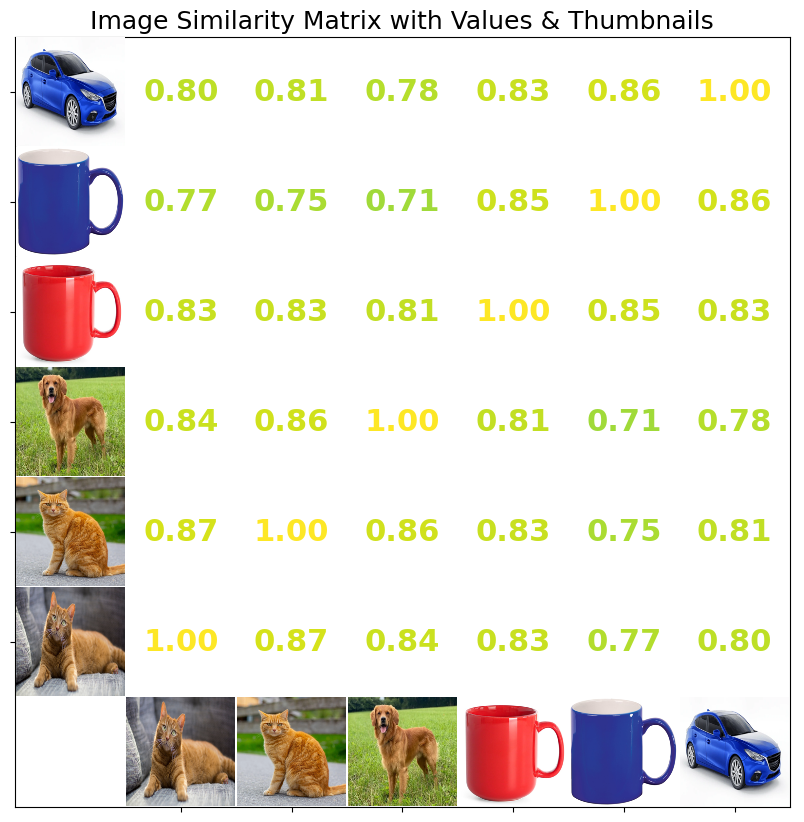

In [43]:
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import cm
from matplotlib.colors import Normalize

def load_images(image_paths, size=(224, 224)):
    """
    Load and resize images, return as flattened arrays + thumbnails.
    """
    image_vectors = []
    thumbnails = []
    for path in image_paths:
        img = Image.open(path).convert('RGB').resize(size)
        img_array = np.array(img).astype(np.float32).flatten()
        image_vectors.append(img_array)
        thumbnails.append(img)
    return np.stack(image_vectors), thumbnails

def compute_similarity_matrix(image_vectors):
    return cosine_similarity(image_vectors)

def plot_similarity_matrix_with_values(sim_matrix, thumbnails):
    n = sim_matrix.shape[0]

    fig, ax = plt.subplots(figsize=(10, 10))

    # Remove default tick labels
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Offsets for thumbnails
    HORIZONTAL_OFFSET = -1.0   # Above first row
    VERTICAL_OFFSET = -1.0     # Left of first column

    # Expand limits so images aren't clipped
    ax.set_xlim(VERTICAL_OFFSET - 0.5, n - 0.5)
    ax.set_ylim(HORIZONTAL_OFFSET - 0.5, n - 0.5)

    # Add horizontal thumbnails above matrix
    for i, thumbnail in enumerate(thumbnails):
        imagebox = OffsetImage(thumbnail, zoom=0.35)
        ab = AnnotationBbox(
            imagebox,
            (i, HORIZONTAL_OFFSET),
            frameon=False,
            xycoords='data',
            box_alignment=(0.5, 0.5)
        )
        ax.add_artist(ab)

    # Add vertical thumbnails left of matrix
    for i, thumbnail in enumerate(thumbnails):
        imagebox = OffsetImage(thumbnail, zoom=0.35)
        ab = AnnotationBbox(
            imagebox,
            (VERTICAL_OFFSET, i),
            frameon=False,
            xycoords='data',
            box_alignment=(0.5, 0.5)
        )
        ax.add_artist(ab)

    # Normalize similarity to [0, 1] for colormap
    cmap = cm.get_cmap('viridis')
    norm = Normalize(vmin=-1, vmax=1)

    # Add numeric similarity values with larger font
    for i in range(n):
        for j in range(n):
            val = sim_matrix[i, j]
            color = cmap(norm(val))
            ax.text(
                j, i,
                f"{val:.2f}",
                ha='center',
                va='center',
                color=color,
                fontsize=22,     # 🔥 Bigger text here!
                fontweight='bold'
            )

    ax.set_title("Image Similarity Matrix with Values & Thumbnails", fontsize=18)

    plt.show()



if __name__ == "__main__":
    image_paths = [
        'images/cat1.jpg',
        'images/cat2.webp',
        'images/retriever1.webp',
        'images/red_mug.jpg',
        'images/blue_mug_close.jpeg',
        'images/blue_car.webp',
    ]

    image_vectors, thumbnails = load_images(image_paths)
    sim_matrix = compute_similarity_matrix(image_vectors)
    plot_similarity_matrix_with_values(sim_matrix, thumbnails)


/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


blue_car.webp
blue_mug_close.jpeg
cat1.jpg
cat2.webp
red_mug_holding.webp
red_mug_top.jpg
retriever1.webp
retriever2.jpg
red_mug.jpg
Using cached ./models


Using cache found in ./models/facebookresearch_dino_main
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


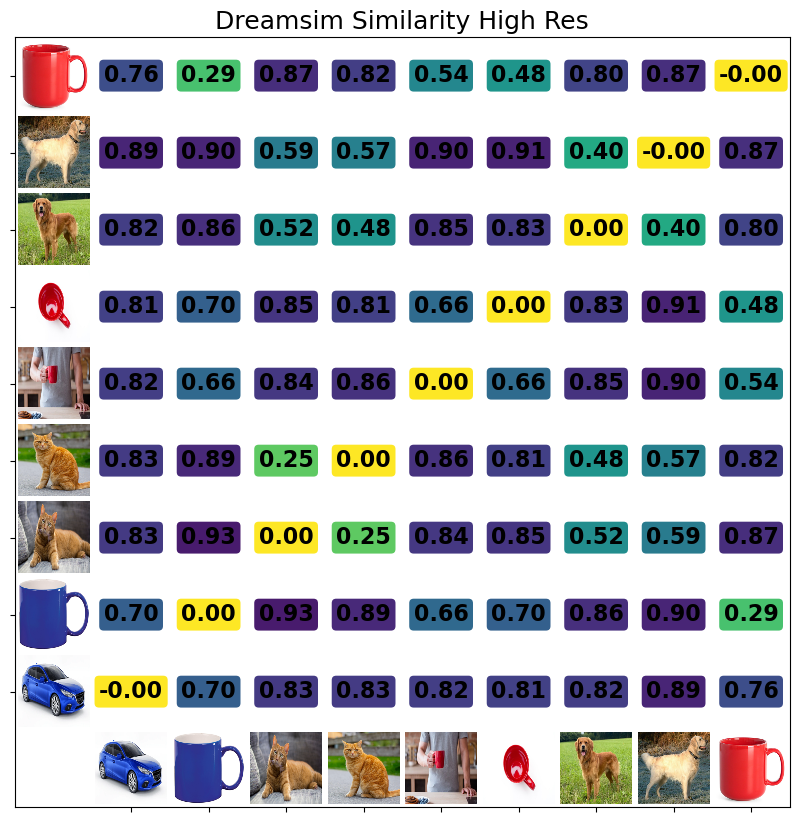

In [1]:
from similarity_tests import *
images = load_images("images")
arr = conv_imglist_to_ndarray(images)
m = compute_matrix_dreamsim(images)
plot_similarity_matrix_with_values(m, images, sizes=(0.23, 16), title="Dreamsim Similarity High Res")

In [ ]:
arr = conv_imglist_to_ndarray(images)

In [4]:
print(arr.shape)

(9, 224, 224, 3)


In [5]:
m = compute_matrix_dreamsim(images)

Using cached ./models


Using cache found in ./models/facebookresearch_dino_main
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [7]:
plot_similarity_matrix_with_values(m, images, sizes=(0.23, 16), title="Dreamsim Similarity High Res")

TypeError: plot_similarity_matrix_with_values() got an unexpected keyword argument 'title'

blue_car.webp
blue_mug_close.jpeg
cat1.jpg
cat2.webp
red_mug_holding.webp
red_mug_top.jpg
retriever1.webp
retriever2.jpg
red_mug.jpg
Using cached ./models


Using cache found in ./models/facebookresearch_dino_main
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


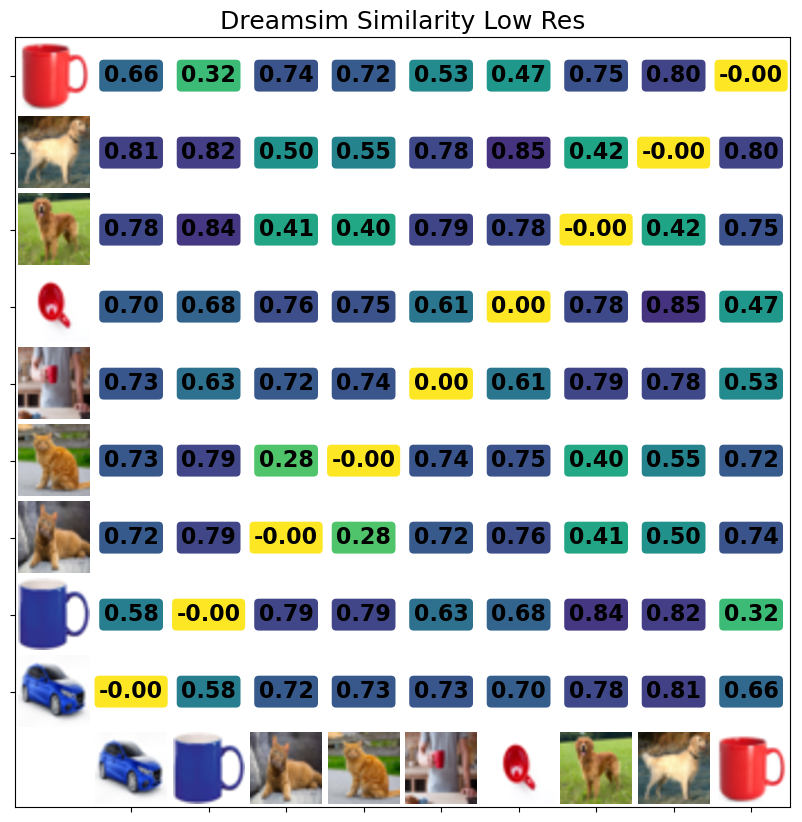

In [ ]:

from similarity_tests import *
images = load_images("images")
images2 = [img.resize((32, 32), resample=Image.BILINEAR) for img in images]
#images2 = [img.resize((32,32)) for img in images]
arr = conv_imglist_to_ndarray(images)
m = compute_matrix_dreamsim(images2)
plot_similarity_matrix_with_values(m, images2, sizes=(0.23, 16), title="Dreamsim Similarity Low Res")

/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


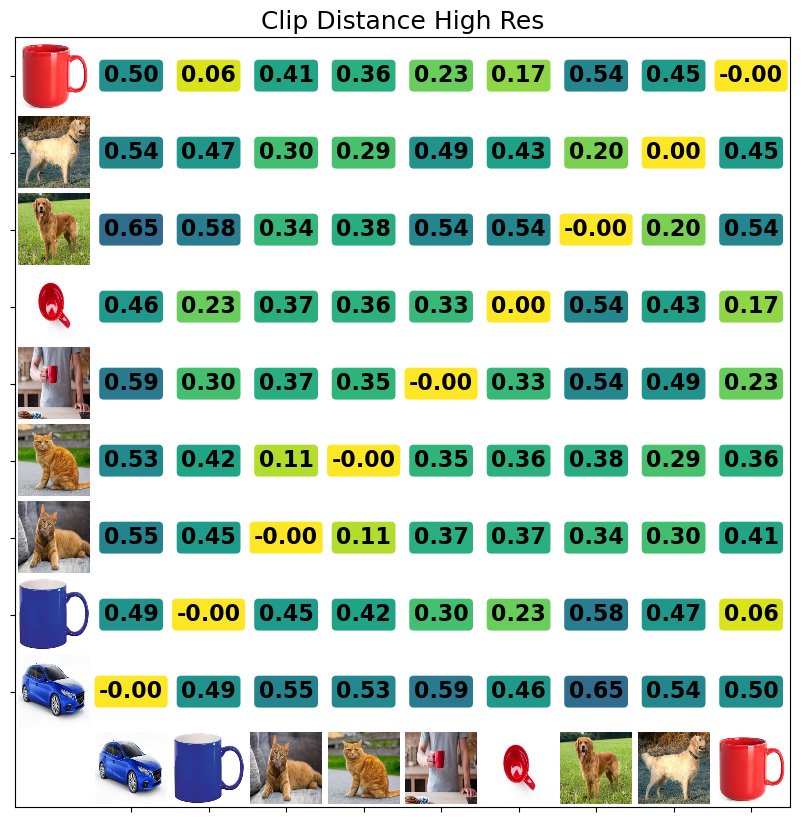

In [1]:
from similarity_tests import *
images = load_images("images")
images2 = images
#images2 = [img.resize((32, 32), resample=Image.BILINEAR) for img in images]
#images2 = [img.resize((32,32)) for img in images]
m = compute_matrix_clip(images2)
plot_similarity_matrix_with_values(m, images2, sizes=(0.23, 16), title="Clip Distance High Res")

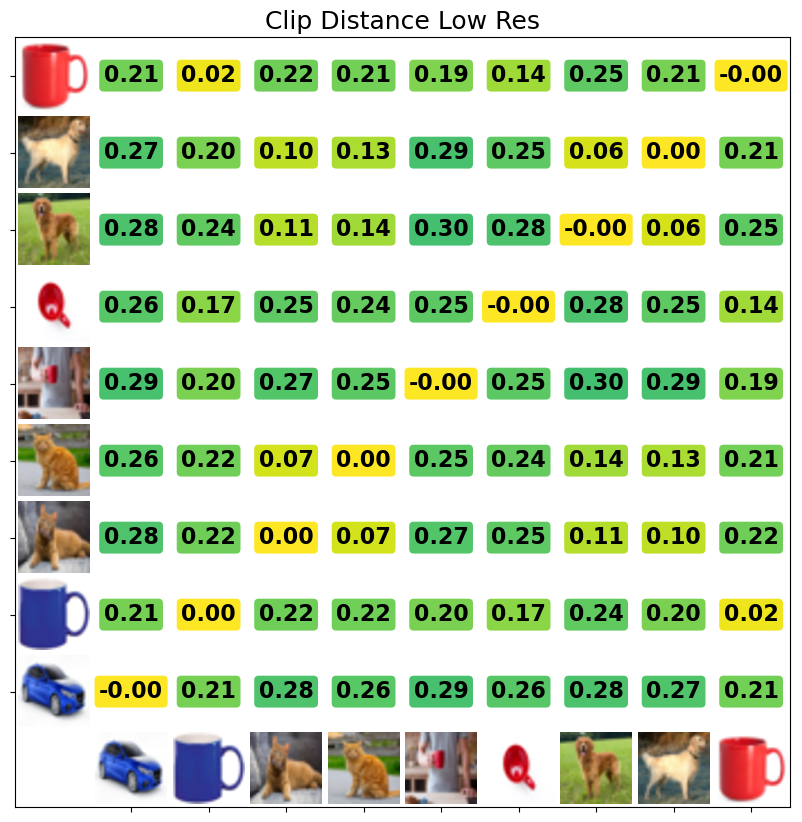

In [2]:
from similarity_tests import *
images = load_images("images")
images2 = images
images2 = [img.resize((32, 32), resample=Image.BILINEAR) for img in images]
#images2 = [img.resize((32,32)) for img in images]
m = compute_matrix_clip(images2)
plot_similarity_matrix_with_values(m, images2, sizes=(0.23, 16), title="Clip Distance Low Res")